In [14]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np
import getpass
import requests
import json

In [5]:
raw_report = pd.read_csv("../../../data/Reports Villa Lobos/my_report(01-10-22).csv")

In [10]:
#obtendo somente as viagens feitas para o parque
trips_to_park = raw_report[raw_report["origin_id"] != 195]

In [66]:
#Function to normalize the "total_trips" column
#total_trips is str and has some '<10' values
def normalize(df):
    for key, value in df["total_trips"].iteritems():
        if value == '<10':
            df.at[key, 'total_trips'] = '5'
    
    df['total_trips'] = df['total_trips'].astype(float)
#     print(df['total_trips'].sum())
    return(df)

In [12]:
normalize(trips_to_park)

16786.010000000002


C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\3283907314.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():
C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\3283907314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_trips'] = df['total_trips'].astype(float)


## Hourly data

In [15]:
code = input("Enter Project" + "'s " + "Code: ")

Enter Project's Code: ef04c53c-457d-41c6-969b-1bfa64c757a9


In [43]:
code =="ef04c53c-457d-41c6-969b-1bfa64c757a9"

True

In [ ]:
def hourly_script(code, day, month, year, core_name, user):
    
    #######################
    #fixing month and year inputs
    if month < 10:
        month = str(0) + str(month)
    else:
        month = str(month)
        
    if day < 10:
        day = str(0) + str(day)
    else:
        day = str(day)
        
    if year < 2000:
        year = str(20) + str(year)
    else:
        year = str(year)
    #######################
    
    root = "https://api.claro-br.kidodynamics.com/v1/"
    project_root = root + 'project/{'+ code + '}'
    
    #login
#     user = input('Enter username:')
    password = getpass.getpass('Pass')

    user = user
    
    login_response = requests.post(
    root + 'users/login',
    headers={
        'accept': 'application/json',
        'Content-Type': 'application/x-www-form-urlencoded',
    },
    data=f'grant_type=&username={user}&password={password}'
    )
    token = login_response.json()['access_token']
    
    
    def headers(token):
        return {
            'accept': 'application/json',
            'Authorization': f"Bearer {token}"
        }
    
    url = 'https://api.claro-br.kidodynamics.com/v1/projects/' +  code + '/query?metric=total_trips&matrix=trips&date_start='+ year + '-' + month + '-' + day + '&date_end='+ year + '-' + month + '-' + day + '&' 

    #script hourly
    DF = pd.DataFrame()
    df = pd.DataFrame()

    for i in range(24):
        response = requests.get(url + "arrivals=" + str(i), headers=headers(token))
        data = json.loads(response.text)
        df = pd.DataFrame(data["data"])
        df['Arrival Hour'] = i
        #removing "<10"
        df = normalize(df)
        DF = pd.concat([DF, df], axis=0, ignore_index=True)
      
    #removing core as origin trips
    
    rows_to_drop = DF.loc[DF["origin_id"].str.contains(core_name)]
    DF = DF.drop(rows_to_drop.index)
    DF2 = DF

    
    #ploting and printing
    DF = DF[["total_trips" , "Arrival Hour"]]
    DF = DF.groupby('Arrival Hour').sum()
    DF.plot.bar(figsize=(18,6))
    print("\nTotal trips made to the core area on this date: " + str(DF["total_trips"].sum()))
    
    return(DF2)

In [71]:
df = hourly_script(code, 1, 10, 2022, "Villa Lobos Park", "gabrieljunqueirasouza@hotmail.com")

Pass········


C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\1623616631.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():
C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\1623616631.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():
C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\1623616631.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():
C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\1623616631.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():
C:\Users\gabri\AppData\Local\Temp\ipykernel_10016\1623616631.py:4: FutureWarning: iteritems is deprecated and will be removed in

In [ ]:
gabrieljunqueirasouza@hotmail.com

p6JV_(D?HAVQ

In [72]:
df

,origin_id,destination_id,total_trips,Arrival Hour
0,"Carapicuíba, (16)","Villa Lobos Park, (195)",13.57,0
1,"Embu das Artes, (26)","Villa Lobos Park, (195)",5.00,0
2,"Osasco, (61)","Villa Lobos Park, (195)",5.00,0
3,"PERDIZES, (103)","Villa Lobos Park, (195)",5.00,0
4,"SANTO AMARO, (107)","Villa Lobos Park, (195)",5.00,0
...,...,...,...,...
235,"Guarulhos, (33)","Villa Lobos Park, (195)",20.56,23
236,"Itapevi, (41)","Villa Lobos Park, (195)",5.00,23
237,"Jundiaí, (48)","Villa Lobos Park, (195)",5.00,23
238,"Osasco, (61)","Villa Lobos Park, (195)",27.05,23



Total trips made to the core area on this date: 2089.63


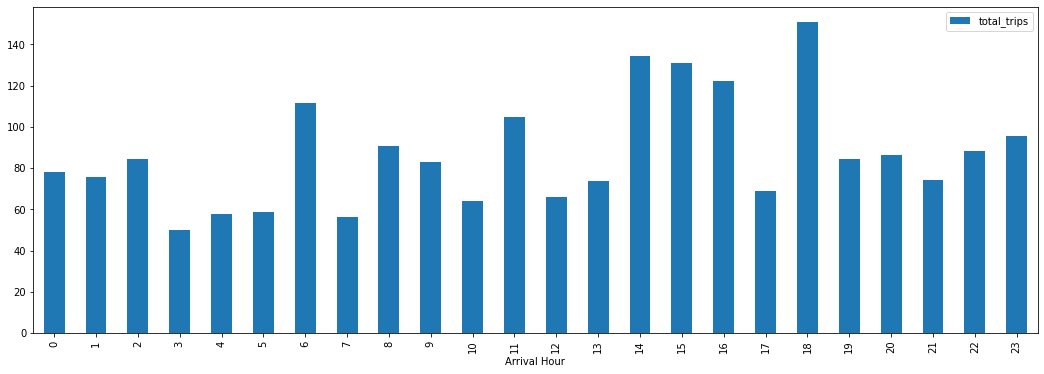

In [73]:
DF = df[["total_trips" , "Arrival Hour"]]
DF = DF.groupby('Arrival Hour').sum()
DF.plot.bar(figsize=(18,6))
print("\nTotal trips made to the core area on this date: " + str(DF["total_trips"].sum()))

In [75]:
df[df["origin_id"] == "Villa Lobos Park, (195)"]

,origin_id,destination_id,total_trips,Arrival Hour
